In [30]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from utils_notebook import modal_probs_decreasing, f_probs_ovr_poe_logits_weighted_generalized, get_metrics_for_paper

In [53]:
# DATASET = 'imdb'
# DATASET = 'ag'
DATASET = 'snli'

In [54]:
logits = torch.load(f'outputs/{DATASET}_logits.pt', map_location=torch.device('cpu'))
targets = torch.load(f'outputs/{DATASET}_targets.pt', map_location=torch.device('cpu'))

In [55]:
L = logits.shape[0]
N = logits.shape[1]
C = logits.shape[2]

logits.shape, targets.shape

(torch.Size([4, 9824, 3]), torch.Size([9824]))

In [56]:
acc_dict, mono_dict, ground_truth_dict = get_metrics_for_paper(logits, targets, DATASET.upper())

In [57]:
acc_dict

{'SNLI': [0.7376, 0.8631, 0.8633, 0.8636],
 'SNLI-PA': [0.7376, 0.8443, 0.848, 0.8519],
 'SNLI-CA': [0.7376, 0.8492, 0.851, 0.852]}

In [58]:
mono_dict

{'SNLI': [47.6792, 12.8156, 5.9752, 2.0053, 1.2215, 0.509, 0.0814],
 'SNLI-PA': [7.1458, 2.0969, 0.6515, 0.1934, 0.1425, 0.1221, 0.1221],
 'SNLI-CA': [0.0509, 0.0204, 0.0102, 0.0, 0.0, 0.0, 0.0]}

In [59]:
ground_truth_dict

{'SNLI': [51.2622, 17.3962, 10.2097, 5.059, 3.8477, 2.331, 0.855],
 'SNLI-PA': [10.7085, 5.9548, 4.4585, 3.5729, 3.2064, 2.7077, 1.4353],
 'SNLI-CA': [8.123, 6.3314, 4.8147, 2.728, 2.1274, 1.3538, 0.4886]}

In [5]:
probs = torch.softmax(logits, dim=2)
preds = {i: torch.argmax(probs, dim=2)[i, :] for i in range(L)}
acc = [(targets == preds[i]).sum() / len(targets) for i in range(L)]
msp = {i: torch.max(probs, dim=2).values[i, :] for i in range(L)}

In [6]:
T = 1.
probs_poe_ovr_break_ties_generalized = torch.tensor(f_probs_ovr_poe_logits_weighted_generalized(logits, weights=(np.arange(1, L + 1, 1, dtype=float) / L) * T))
preds_poe_ovr_break_ties_generalized = {i: torch.argmax(probs_poe_ovr_break_ties_generalized, dim=2)[i, :] for i in range(L)}
acc_poe_ovr_break_ties_generalized = [(targets == preds_poe_ovr_break_ties_generalized[i]).sum() / len(targets) for i in range(L)]

In [7]:
torch.isnan(probs_poe_ovr_break_ties_generalized).any()

tensor(False)

In [8]:
[round(float(x), 4) for x in acc]

[0.7376, 0.8631, 0.8633, 0.8636]

In [9]:
modal_probs_decreasing(preds, probs, L, N=N, thresholds=[-0.0001, -0.01, -0.05, -0.1, -0.2, -0.25, -0.33, -0.5, -0.75], diffs_type='all')

{0.0001: 83.33672638436482,
 0.01: 47.67915309446254,
 0.05: 12.815553745928337,
 0.1: 5.975162866449511,
 0.2: 2.0052931596091206,
 0.25: 1.221498371335505,
 0.33: 0.508957654723127,
 0.5: 0.08143322475570033,
 0.75: 0.0}

In [10]:

[round(float(x), 4) for x in acc_poe_ovr_break_ties_generalized]

[0.7376, 0.8443, 0.848, 0.8519]

In [11]:
modal_probs_decreasing(preds_poe_ovr_break_ties_generalized, probs_poe_ovr_break_ties_generalized, 
                                             L, N=N, thresholds=[-0.0001, -0.01, -0.05, -0.1, -0.2, -0.25, -0.33, -0.5, -0.75], diffs_type='all', verbose=True)

8 [0.         0.         0.86717    0.81760716]
8 [0.         0.         0.86717    0.81760716]
9 [0.         0.92717475 0.90392417 0.9099278 ]
9 [0.         0.92717475 0.90392417 0.9099278 ]
47 [0.         0.7113328  0.8360204  0.81587017]
47 [0.         0.7113328  0.8360204  0.81587017]
70 [0.         0.93099254 0.9337957  0.8845595 ]
70 [0.         0.93099254 0.9337957  0.8845595 ]
79 [0.         0.9816164  0.98047584 0.96644455]
79 [0.         0.9816164  0.98047584 0.96644455]
80 [0.         0.99185044 0.99064493 0.9846334 ]
87 [0.         0.7090668  0.6826279  0.62065077]
87 [0.         0.7090668  0.6826279  0.62065077]
87 [0.         0.7090668  0.6826279  0.62065077]
92 [0.         0.8809825  0.8628311  0.81998044]
92 [0.         0.8809825  0.8628311  0.81998044]
92 [0.         0.8809825  0.8628311  0.81998044]
100 [0.         0.98393226 0.9846265  0.9831376 ]
123 [0.         0.4968815  0.45994553 0.469572  ]
123 [0.         0.4968815  0.45994553 0.469572  ]
143 [0.         0.927

{0.0001: 9.1307003257329,
 0.01: 7.1457654723127035,
 0.05: 2.0969055374592833,
 0.1: 0.6514657980456027,
 0.2: 0.19340390879478828,
 0.25: 0.14250814332247558,
 0.33: 0.12214983713355047,
 0.5: 0.12214983713355047,
 0.75: 0.0}

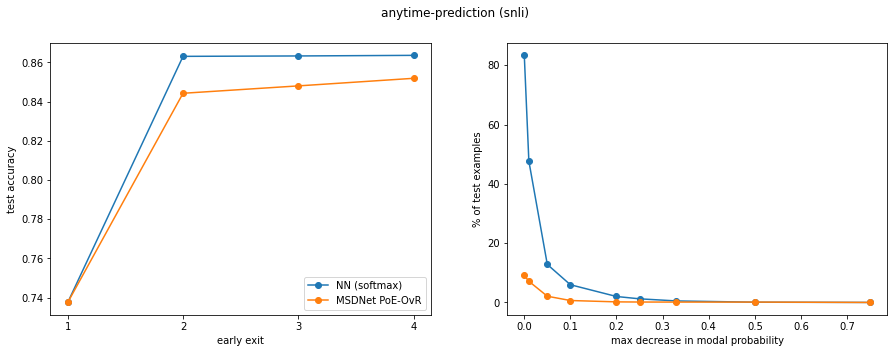

In [12]:
early_exits = [i + 1 for i in range(len(acc))]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(early_exits, acc, label='NN (softmax)', marker='o',)
ax[0].plot(early_exits, acc_poe_ovr_break_ties_generalized, label='MSDNet PoE-OvR', marker='o')
ax[0].legend()
ax[0].set_ylabel('test accuracy')
ax[0].set_xlabel('early exit')
ax[0].set_xticks(early_exits)

for _preds, _probs, label in [
                            (preds, probs, 'NN (softmax)'), 
                            (preds_poe_ovr_break_ties_generalized, probs_poe_ovr_break_ties_generalized, 'MSDNet PoE-OvR'),
                            ]:
    modal_probs = modal_probs_decreasing(_preds, _probs, L, N=N, thresholds=[-0.0001, -0.01, -0.05, -0.1, -0.2, -0.25, -0.33, -0.5, -0.75], diffs_type='all')
    ax[1].plot(modal_probs.keys(), modal_probs.values(), marker='o', label=label)
# ax[1].legend()
# ax[1].set_title('anytime-prediction')
ax[1].set_xlabel('max decrease in modal probability')
ax[1].set_ylabel('% of test examples')


plt.suptitle(f'anytime-prediction ({DATASET})')
plt.show()

In [13]:
zero_prob_ids = []
for n in range(N):
    if torch.max((logits[:, n, :] > 0).sum(axis=0)) != L:
        zero_prob_ids.append(n)

In [14]:
len(zero_prob_ids) / N

0.13884

In [15]:
i = 0
logits[:, i, :], probs_poe_ovr_break_ties_generalized[:, i, :]

(tensor([[-0.1536,  0.6087],
         [ 0.3132, -0.3135],
         [ 0.7611, -0.6028],
         [ 0.7949, -0.7246]]),
 tensor([[0.0000, 1.0000],
         [0.6518, 0.3482],
         [0.7964, 0.2036],
         [0.8205, 0.1795]]))

In [16]:
i = 34
print("id: ", i, " modal-prob id: ", int(preds_poe_ovr_break_ties_generalized[L - 1][i]))
# for l in range(L):
#     print(f'early exit {l + 1}')
#     print(logits[l, i, :])
#     print(probs_poe_ovr_break_ties_generalized[l, i, :])
#     print('\n')
print(f'===============LOGITS=================')
print(logits[:, i, :])
print(f'===============PoE-OvR probs=================')
print(probs_poe_ovr_break_ties_generalized[:, i, :])


id:  34  modal-prob id:  1
===============LOGITS=================
tensor([[ 0.5439, -0.0812],
        [-0.2033,  0.2257],
        [-0.2366,  0.2049],
        [-0.7866,  1.0103]])
===============PoE-OvR probs=================
tensor([[1.0000, 0.0000],
        [0.3944, 0.6056],
        [0.3914, 0.6086],
        [0.1422, 0.8578]])


In [17]:
# fig, ax = plt.subplots(L, 2, figsize=(5, 15), sharey=True)
# for l in range(L):
#     ax[l, 0].bar(np.arange(1, C + 1, 1), logits[l, i, :].numpy())
#     ax[l, 1].bar(np.arange(1, C + 1, 1), probs_poe_ovr_break_ties_generalized[l, i, :].numpy())
# plt.show()